In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import csv

In [2]:
items=[]
with open('mushroom.dat', 'r') as file:
    dataset = csv.reader(file, delimiter=' ')
    for row in dataset:
        temp=[element for element in row]
        temp= temp[:-1]
        items.append(temp)

In [3]:
apc_times = list()
apc_elements = list()
minsupport = .2
while minsupport <=1:
  start = time.process_time()
  te = TransactionEncoder()
  te_ary = te.fit(items).transform(items)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  result= apriori(df, min_support= minsupport, use_colnames=True)
  apc_elements.append(minsupport)    
  end = time.process_time()
  apc_times.append(end-start)
  print (result)
  # total time taken
  print(f"Runtime of the program is {end - start}")
  minsupport +=.2

        support                                           itemsets
0      0.482029                                                (1)
1      0.399311                                               (10)
2      0.200886                                              (101)
3      0.293944                                              (102)
4      0.285574                                               (11)
...         ...                                                ...
53578  0.212703  (39, 2, 90, 93, 34, 116, 63, 23, 59, 85, 53, 3...
53579  0.212703  (39, 28, 2, 90, 93, 34, 116, 63, 36, 59, 85, 5...
53580  0.212703  (39, 28, 90, 93, 34, 116, 63, 23, 59, 85, 53, ...
53581  0.212703  (39, 28, 2, 90, 93, 34, 63, 23, 59, 85, 53, 36...
53582  0.212703  (39, 28, 2, 90, 93, 34, 116, 63, 23, 59, 85, 5...

[53583 rows x 2 columns]
Runtime of the program is 16.578125
      support                      itemsets
0    0.482029                           (1)
1    0.497292                         (110)
2 

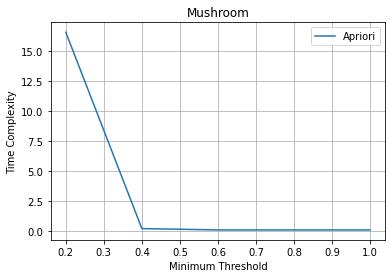

In [4]:
plt.title('Mushroom')
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apc_elements, apc_times, label ='Apriori')
plt.grid()
plt.legend()
plt.savefig('AprioriMushroom.pdf',bbox_inches='tight')
plt.show()

In [5]:
items=[]
with open('mushroom.dat', 'r') as file:
    dataset = csv.reader(file, delimiter=' ')
    for row in dataset:
        temp=[element for element in row]
        #temp=temp[:1]
        items.append(temp)

In [6]:
fpc_times = list()
fpc_elements = list()
minsupport = .2
while minsupport <=1:
  start = time.process_time()
  te = TransactionEncoder()
  te_ary = te.fit(items).transform(items)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  result= fpgrowth(df, min_support= minsupport, use_colnames=True)
  fpc_elements.append(minsupport)    
  end = time.process_time()
  fpc_times.append(end-start)
  print (result)
  # total time taken
  print(f"Runtime of the program is {end - start}")
  minsupport +=.2

         support                                           itemsets
0       1.000000                                                 ()
1       1.000000                                               (85)
2       0.975382                                               (86)
3       0.974151                                               (34)
4       0.921713                                               (90)
...          ...                                                ...
107162  0.212703  (, 24, 110, 1, 90, 48, 34, 36, 53, 85, 58, 86,...
107163  0.212703  (, 24, 110, 1, 90, 48, 34, 36, 53, 85, 58, 94,...
107164  0.212703  (, 24, 110, 1, 90, 48, 34, 36, 53, 85, 94, 86,...
107165  0.212703  (, 24, 110, 1, 90, 48, 34, 36, 53, 85, 58, 94,...
107166  0.212703  (, 24, 110, 1, 90, 48, 34, 36, 53, 85, 58, 94,...

[107167 rows x 2 columns]
Runtime of the program is 1.140625
       support                        itemsets
0     1.000000                              ()
1     1.000000              

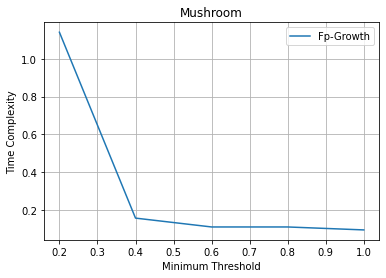

In [7]:
plt.title('Mushroom')
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(fpc_elements, fpc_times, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('FpgrowthMushroom.pdf',bbox_inches='tight')
plt.show()

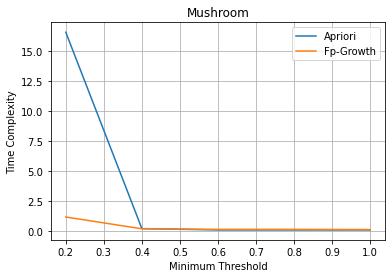

In [8]:
plt.title('Mushroom')
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apc_elements, apc_times, label ='Apriori')
plt.plot(fpc_elements, fpc_times, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('Mushroomcombine.pdf',bbox_inches='tight')
plt.show()